# Challenge 01: Diagonal Unitary Circuit Composer

Write a program that takes as an input a diagonal unitary matrix, and returns a corresponding quantum circuit. For example, given the unitary matrix $\Lambda \in \mathbb{R}^{4\times4}$ shown below, the composer would synthesize the following circuit:

<img src="../images/composer_cir.png" width = 750/>

For this problem, you are not restricted to the use of a particular set of gates. Since different equivalent circuits can have the same unitary operator associated with them, your circuit for $\Lambda$ wouldn't have to necessarily look the same as the one above. For example, depending on your choice of gates, the same unitary $\Lambda$ above could result in circuits with more (or less) number of gates, like the ones shown below:

<img src="../images/composer_cir2.png" width = 680/>

We have broken down this challenge in three levels of difficulty. You don't have to work on these separately nor complete all three of them; If you have an idea how to tackle Level 3, you can just go for it, but if not, solving first two first should help you get started.

**Level 1:** The composer should return a circuit for any unitary matrix $\Lambda \in \mathbb{R}^{4\times4}$. (i.e., $4 \times 4$ matrices with only real entries)

**Level 2:** The composer should return a circuit for any unitary matrix $\Lambda \in \mathbb{R}^{N\times N}$. (i.e., matrices of arbitrary size $N = 2^n$ with only real entries)

**Level 3:** The composer should return a circuit for any unitary matrix $\Lambda \in \mathbb{C}^{N\times N}$. (i.e., matrices of arbitrary size $N = 2^n$ with complex entries)

**Bonus:** The composer should return circuits consisting of only one-qubit and two-qubit gates. The bonus applies to solutions in levels 2 and 3.

The idea behind this challenge is for you to develop an understanding of how circuits can be built out of unitaries, so avoid using functions that do this for you automatically, like the `transpile` function in Qiskit, or the `decompose` function in Cirq.

**Hint:** If you have trouble getting started, it might be helpful to know that this problem is closely related to the design of Oracles for Grover's Algorithm [1].

[1] Figgatt, Caroline, et al. "Complete 3-Qubit Grover search on a programmable quantum computer." Nature communications 8.1 (2017): 1-9. [arXiv:1703.10535](https://arxiv.org/pdf/1703.10535.pdf)

# Level 1

My solution is likely going to be the most naive of all submitted. I've chosen to stay away from looking at any references. Never having tried this before I wanted to work this out empirically. The result will most definitely be suboptimal.

In [1]:
import numpy as np
import itertools
import ipywidgets as widgets

All unitary matrices, $U$, must have $|\det(U)| = 1$

In [2]:
Λ = np.diag([-1, 1, 1, 1])
print(Λ)
np.linalg.norm(np.linalg.det(Λ))

[[-1  0  0  0]
 [ 0  1  0  0]
 [ 0  0  1  0]
 [ 0  0  0  1]]


1.0

In [3]:
from qiskit import QuantumCircuit
from qiskit.extensions import UnitaryGate

In [4]:
ug = UnitaryGate(Λ)
ug.to_matrix()

array([[-1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j,  1.+0.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j,  1.+0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j,  0.+0.j,  1.+0.j]])

Just for reference, let me see the form of what Qiskit does

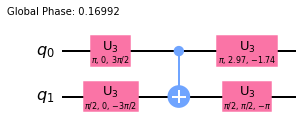

In [5]:
qc = QuantumCircuit(2)
qc.append(ug, range(qc.num_qubits))
qc.decompose().draw()

In [6]:
import qiskit.quantum_info as qi
sv = qi.Statevector([1, 0, 0, 0])
sv.evolve(qi.Operator(qc))

Statevector([-1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
            dims=(2, 2))

Let me start with a 2x2 matrix to gain some intuition

In [7]:
show_all = True
all_correct = True
for diag in list(itertools.product([1, -1], repeat=2)):
    correct = True
    out = widgets.Output()    
    with out:
        Λ = np.diag(diag)
        qc = QuantumCircuit(1)
        print("Qiskit composition")
        qc.unitary(Λ, range(qc.num_qubits))
        display(qc.decompose().draw())

        ug = UnitaryGate(qi.Operator(qc))
        um = ug.to_matrix()
        print(um)
        print()

        dc = QuantumCircuit(1)
        for i,el in enumerate(diag):
            if el == -1:
                if i == 0:
                    dc.x(0)
                dc.z(0)
                if i == 0:
                    dc.x(0)
        print("Unitary composition")
        display(dc.decompose().draw())
        dug = UnitaryGate(qi.Operator(dc))
        dm = dug.to_matrix()
        print(dm)

        correct = np.allclose(um, dm)
        if correct:
            print("Compositions equal ✅")
        else:
            all_correct = False
            print("Compositions differ ❌")

        print('-' * 30)
        
    if not correct or show_all:
        display(out)

if all_correct:
    print("All compositions equal ✅")    

Output()

Output()

Output()

Output()

All compositions equal ✅


Okay, let me try a 4x4 now

In [8]:
show_all = True
all_correct = True
for diag in list(itertools.product([1, -1], repeat=4)):
    correct = True
    out = widgets.Output()    
    with out:
        Λ = np.diag(diag)
        qc = QuantumCircuit(2)
        print("Qiskit composition")
        qc.unitary(Λ, range(qc.num_qubits))
        display(qc.decompose().draw())

        ug = UnitaryGate(qi.Operator(qc))
        um = ug.to_matrix()
        print(um)
        print()

        dc = QuantumCircuit(2)
        for i,el in enumerate(diag):
            if el == -1:
                if i == 0:
                    dc.x(0)
                    dc.z(0)
                    dc.cz(0, 1)
                    dc.x(0)                    
                if i == 1:
                    dc.x(1)
                    dc.cz(0, 1)
                    dc.x(1)
                elif i == 2:
                    dc.x(0)
                    dc.cz(0, 1)
                    dc.x(0)
                elif i == 3:
                    dc.cz(0, 1)
        print("Unitary composition")
        display(dc.decompose().draw())
        dug = UnitaryGate(qi.Operator(dc))
        dm = dug.to_matrix()
        print(dm)

        correct = np.allclose(um, dm)
        if correct:
            print("Compositions equal ✅")
        else:
            all_correct = False
            print("Compositions differ ❌")

        print('-' * 30)
        
    if not correct or show_all:
        display(out)

if all_correct:
    print("All compositions equal ✅")

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

All compositions equal ✅


# Level 2

Okay, so I got a 4x4 working empirically, but I need to figure out something more general now. As we grow to more qubits the number of permutations grows considerably, so we will need to start random sampling. However, we'll verify all of the permutations for 2 and 3 qubits.

NOTE: I went through many permutations on this below and am only leaving the final result. I had a general solution for 2 qubits, but as soon as I went to 4 qubits I started to have problems. Then, I realized that this was similar to loading a qram and that it was necessary to think about it as "addressing" a specific element in the diagonal matrix.

In [9]:
import random
def sample_diagonals(N, samplesize):
    results = []    
    while samplesize > 0:
        v = []
        while len(v) < N:
            if random.randint(0, 1) == 0:
                v.append(-1)
            else:
                v.append(1)
        if v not in results:
            results.append(v)
            samplesize -= 1
    return results

def validate_composition(num_qubits, max_samples=16):    
    def bitfield(n, max_bits):    
        return [int(digit) for digit in f'{{0:0{max_bits}b}}'.format(n)]

    show_all = False
    all_correct = True
    print_last = True
    N = 2**num_qubits
    total_count = 2**N
    if total_count < max_samples:
        diagonals = list(itertools.product([1, -1], repeat=N))
    else:
        diagonals = sample_diagonals(N, max_samples)
        print(f"Validating {len(diagonals)} random samples from {total_count} total")
        
    for d, diag in enumerate(diagonals):
        correct = True
        out = widgets.Output()    
        with out:
            dc = QuantumCircuit(num_qubits)
            for i,el in enumerate(diag):
                if el == -1:
                    for j, a in enumerate(reversed(bitfield(i, num_qubits))):
                        if not a:
                            dc.x(j)
                            
                    if num_qubits == 1:
                        dc.z(0)
                    else:
                        # equivalent to an mcz
                        dc.h(num_qubits - 1)
                        dc.mcx(list(range(num_qubits - 1)), num_qubits - 1)
                        dc.h(num_qubits - 1)

                    for j, a in enumerate(reversed(bitfield(i, num_qubits))):
                        if not a:
                            dc.x(j)
            print("Unitary composition")
            print(diag)
            display(dc.draw())
            dug = UnitaryGate(qi.Operator(dc))
            dm = dug.to_matrix().diagonal()

            correct = np.allclose(diag, dm)
            if correct:
                print("Compositions equal ✅")
            else:
                print(dm)
                all_correct = False
                print("Compositions differ ❌")

            print('-' * 30)

        should_print_last = (print_last and d == len(diagonals) - 1)
        if not correct or show_all or should_print_last:
            display(out)
            if should_print_last:
                print(f"👆 Showing last sample for inspection")

    if all_correct:
        print("All compositions equal ✅")

limit_samples = 256
for qubit_count in list(range(1,5+1)):
    print(f"Testing compositions for {qubit_count} qubits ({2**qubit_count}x{2**qubit_count} matrices)")
    validate_composition(qubit_count, limit_samples)
    limit_samples >>= 1
    print()
    print('#' * 60)
    print()

Testing compositions for 1 qubits (2x2 matrices)


Output()

👆 Showing last sample for inspection
All compositions equal ✅

############################################################

Testing compositions for 2 qubits (4x4 matrices)


Output()

👆 Showing last sample for inspection
All compositions equal ✅

############################################################

Testing compositions for 3 qubits (8x8 matrices)
Validating 64 random samples from 256 total


Output()

👆 Showing last sample for inspection
All compositions equal ✅

############################################################

Testing compositions for 4 qubits (16x16 matrices)
Validating 32 random samples from 65536 total


Output()

👆 Showing last sample for inspection
All compositions equal ✅

############################################################

Testing compositions for 5 qubits (32x32 matrices)
Validating 16 random samples from 4294967296 total


Output()

👆 Showing last sample for inspection
All compositions equal ✅

############################################################



Okay, I fairly confident about this although I haven't exhaustively tested all permutations up through and past 5 qubits.

# Level 3

Now that we're dealing with complex entries, let me start small again and build up. For starters, I don't think all permutations of diagonals with complex values are unitary. So, I think I'll want to strip those out of the set. However, I'm curious about diagonals that only have a single imaginary. Are those still unitary?

In [12]:
Λ = np.diag([-1, 1, 1, 1j])
print(Λ)
print(np.linalg.norm(np.linalg.det(Λ)))

[[-1.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  1.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  1.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+1.j]]
1.0


Okay, so I guess I just need to expand permutations to include _i_ and _-i_.

In [14]:
def sample_complex_diagonals(N, samplesize):
    results = []    
    while samplesize > 0:
        v = []
        while len(v) < N:
            choice = random.randint(0, 4)
            if choice == 0:
                v.append(-1)
            elif choice == 1:
                v.append(1)
            elif choice == 2:
                v.append(1j)
            else:
                v.append(0-1j)
        if v not in results:
            results.append(v)
            samplesize -= 1
    return results

def validate_composition(num_qubits, max_samples=16):    
    def bitfield(n, max_bits):    
        return [int(digit) for digit in f'{{0:0{max_bits}b}}'.format(n)]

    show_all = False
    all_correct = True
    print_last = True
    N = 2**num_qubits
    total_count = 2**N
    if total_count < max_samples:
        diagonals = list(itertools.product([1, -1, 1j, 0-1j], repeat=N))
    else:
        diagonals = sample_complex_diagonals(N, max_samples)
        print(f"Validating {len(diagonals)} random samples from {total_count} total")
        
    for d, diag in enumerate(diagonals):
        correct = True
        out = widgets.Output()    
        with out:
            dc = QuantumCircuit(num_qubits)
            for i,el in enumerate(diag):
                if el != 1:
                    for j, a in enumerate(reversed(bitfield(i, num_qubits))):
                        if not a:
                            dc.x(j)

                    # instead of z gates, let's now use phase gates to allow for arbitrary phase
                    if num_qubits == 1:
                        dc.p(np.angle(el), 0)
                    else:
                        dc.mcp(np.angle(el), list(range(num_qubits - 1)), num_qubits - 1)

                    for j, a in enumerate(reversed(bitfield(i, num_qubits))):
                        if not a:
                            dc.x(j)
            print("Unitary composition")
            print(diag)
            display(dc.draw())
            dug = UnitaryGate(qi.Operator(dc))
            dm = dug.to_matrix().diagonal()

            correct = np.allclose(diag, dm)
            if correct:
                print("Compositions equal ✅")
            else:
                print(dm)
                all_correct = False
                print("Compositions differ ❌")

            print('-' * 30)

        should_print_last = (print_last and d == len(diagonals) - 1)
        if not correct or show_all or should_print_last:
            display(out)
            if should_print_last:
                print(f"👆 Showing last sample for inspection")

    if all_correct:
        print("All compositions equal ✅")

limit_samples = 256
for qubit_count in list(range(1,5+1)):
    print(f"Testing compositions for {qubit_count} qubits ({2**qubit_count}x{2**qubit_count} matrices)")
    validate_composition(qubit_count, limit_samples)
    limit_samples >>= 1
    print()
    print('#' * 60)
    print()

Testing compositions for 1 qubits (2x2 matrices)


Output()

👆 Showing last sample for inspection
All compositions equal ✅

############################################################

Testing compositions for 2 qubits (4x4 matrices)


Output()

👆 Showing last sample for inspection
All compositions equal ✅

############################################################

Testing compositions for 3 qubits (8x8 matrices)
Validating 64 random samples from 256 total


Output()

👆 Showing last sample for inspection
All compositions equal ✅

############################################################

Testing compositions for 4 qubits (16x16 matrices)
Validating 32 random samples from 65536 total


Output()

👆 Showing last sample for inspection
All compositions equal ✅

############################################################

Testing compositions for 5 qubits (32x32 matrices)
Validating 16 random samples from 4294967296 total


Output()

👆 Showing last sample for inspection
All compositions equal ✅

############################################################



Well, from the looks of it the above seems to be a solution. The only thing I'm not completely sure on is whether I am missing permutations of complex-valued diagonals that are still unitary. However, even in that case I think the above solution still works, albeit non-optimally.